In [46]:
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:/tangerine_price_prediction/data/innerjoin.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:800, 1:-1]  # 0 ~ 799번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:800, [-1]]
test_x_data = xy[800:, 1:-1]  # 800번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[800:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))


# 0  손실 비용:  11643747.0
# 500  손실 비용:  2307494.5
# 1000  손실 비용:  2158378.0
# 1500  손실 비용:  2113941.2
# 2000  손실 비용:  2076320.6
# 2500  손실 비용:  2042207.0
# 3000  손실 비용:  2010489.1
# 3500  손실 비용:  1980633.2
# 4000  손실 비용:  1952361.6
# 4500  손실 비용:  1925514.2
# 5000  손실 비용:  1899983.5
# 5500  손실 비용:  1875690.1
# 6000  손실 비용:  1852566.1
# 6500  손실 비용:  1830552.4
# 7000  손실 비용:  1809593.5
# 7500  손실 비용:  1789638.2
# 8000  손실 비용:  1770637.6
# 8500  손실 비용:  1752545.2
# 9000  손실 비용:  1735317.9
# 9500  손실 비용:  1718913.2
# 10000  손실 비용:  1703292.5
# 10500  손실 비용:  1688417.0
# 11000  손실 비용:  1674251.4
# 11500  손실 비용:  1660761.2
# 12000  손실 비용:  1647913.9
# 12500  손실 비용:  1635678.8
# 13000  손실 비용:  1624025.6
# 13500  손실 비용:  1612927.2
# 14000  손실 비용:  1602356.1
# 14500  손실 비용:  1592287.6
# 15000  손실 비용:  1582697.1
# 15500  손실 비용:  1573561.6
# 16000  손실 비용:  1564859.0
# 16500  손실 비용:  1556569.0
# 17000  손실 비용:  1548670.9
# 17500  손실 비용:  1541146.4
# 18000  손실 비용:  1533977.2
# 18500  손실 비용:  1527146

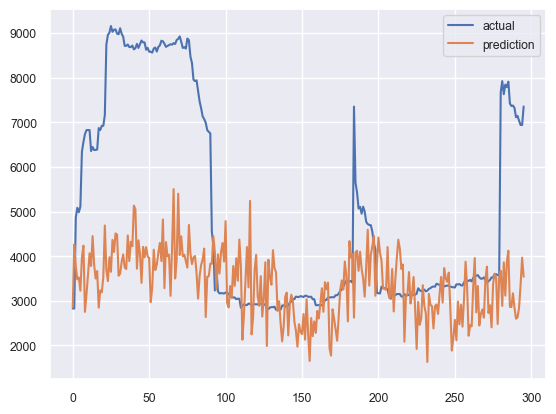

In [47]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [48]:
# 훈련데이터(뒤에서부터 70%)와 테스트 데이터(앞에서부터 30%) 순서 바꿈
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:/tangerine_price_prediction/data/innerjoin.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[300:, 1:-1]  # 300번째 이후 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[300:, [-1]]
test_x_data = xy[:300, 1:-1]  # 0 ~ 299번째 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[:300, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# 0  손실 비용:  19777574.0
# 500  손실 비용:  2664356.0
# 1000  손실 비용:  2585375.2
# 1500  손실 비용:  2565381.8
# 2000  손실 비용:  2549353.5
# 2500  손실 비용:  2535049.8
# 3000  손실 비용:  2521841.8
# 3500  손실 비용:  2509517.2
# 4000  손실 비용:  2497978.8
# 4500  손실 비용:  2487166.2
# 5000  손실 비용:  2477030.8
# 5500  손실 비용:  2467529.2
# 6000  손실 비용:  2458620.2
# 6500  손실 비용:  2450266.2
# 7000  손실 비용:  2442433.0
# 7500  손실 비용:  2435087.5
# 8000  손실 비용:  2428198.5
# 8500  손실 비용:  2421737.0
# 9000  손실 비용:  2415676.8
# 9500  손실 비용:  2409992.0
# 10000  손실 비용:  2404658.5
# 10500  손실 비용:  2399654.8
# 11000  손실 비용:  2394959.8
# 11500  손실 비용:  2390554.0
# 12000  손실 비용:  2386419.0
# 12500  손실 비용:  2382538.2
# 13000  손실 비용:  2378895.0
# 13500  손실 비용:  2375474.2
# 14000  손실 비용:  2372262.2
# 14500  손실 비용:  2369246.0
# 15000  손실 비용:  2366412.8
# 15500  손실 비용:  2363751.0
# 16000  손실 비용:  2361250.0
# 16500  손실 비용:  2358899.8
# 17000  손실 비용:  2356690.8
# 17500  손실 비용:  2354613.2
# 18000  손실 비용:  2352659.8
# 18500  손실 비용:  2350822

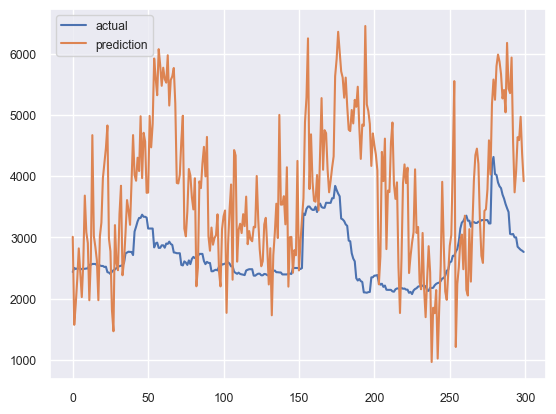

In [49]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [50]:
# 훈련데이터와 테스트 데이터 셔플 후 8:2 비율로 나눈 후 학습 진행
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split

# 데이터를 읽어들입니다.
data = read_csv('C:/tangerine_price_prediction/data/innerjoin.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# feature와 target 데이터로 나눕니다.
X = xy[:, :-1]
y = xy[:, [-1]]

# 훈련 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터와 테스트 데이터를 셔플합니다.
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

test_indices = np.arange(X_test.shape[0])
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# 0  손실 비용:  19839794.0
# 500  손실 비용:  2660763.8
# 1000  손실 비용:  2582793.8
# 1500  손실 비용:  2563238.0
# 2000  손실 비용:  2547429.0
# 2500  손실 비용:  2533276.2
# 3000  손실 비용:  2520195.8
# 3500  손실 비용:  2507985.2
# 4000  손실 비용:  2496553.5
# 4500  손실 비용:  2485840.5
# 5000  손실 비용:  2475797.8
# 5500  손실 비용:  2466383.2
# 6000  손실 비용:  2457555.2
# 6500  손실 비용:  2449278.5
# 7000  손실 비용:  2441516.8
# 7500  손실 비용:  2434238.0
# 8000  손실 비용:  2427412.0
# 8500  손실 비용:  2421009.5
# 9000  손실 비용:  2415004.2
# 9500  손실 비용:  2409370.8
# 10000  손실 비용:  2404085.8
# 10500  손실 비용:  2399127.2
# 11000  손실 비용:  2394475.0
# 11500  손실 비용:  2390108.8
# 12000  손실 비용:  2386011.0
# 12500  손실 비용:  2382164.8
# 13000  손실 비용:  2378554.2
# 13500  손실 비용:  2375164.5
# 14000  손실 비용:  2371980.8
# 14500  손실 비용:  2368991.2
# 15000  손실 비용:  2366183.5
# 15500  손실 비용:  2363545.0
# 16000  손실 비용:  2361066.5
# 16500  손실 비용:  2358736.5
# 17000  손실 비용:  2356546.5
# 17500  손실 비용:  2354487.8
# 18000  손실 비용:  2352551.0
# 18500  손실 비용:  2350729

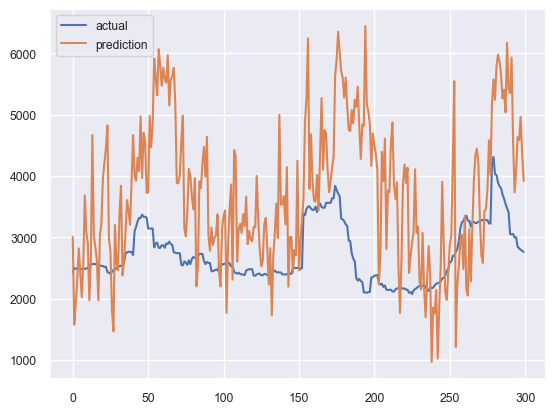

In [51]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [42]:
# 감귤 튀는 값(2021년 7월-9월 가격 삭제) 빼고 진행
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[:800, 1:-1]  # 0 ~ 799번째 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[:800, [-1]]
test_x_data = xy[800:, 1:-1]  # 800번째 이후의 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[800:, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))


# 0  손실 비용:  11518543.0
# 500  손실 비용:  2313764.5
# 1000  손실 비용:  2164199.8
# 1500  손실 비용:  2118821.0
# 2000  손실 비용:  2080643.6
# 2500  손실 비용:  2046158.2
# 3000  손실 비용:  2014157.5
# 3500  손실 비용:  1984064.4
# 4000  손실 비용:  1955581.1
# 4500  손실 비용:  1928538.2
# 5000  손실 비용:  1902825.1
# 5500  손실 비용:  1878359.0
# 6000  손실 비용:  1855071.4
# 6500  손실 비용:  1832902.2
# 7000  손실 비용:  1811795.5
# 7500  손실 비용:  1791699.5
# 8000  손실 비용:  1772565.1
# 8500  손실 비용:  1754345.6
# 9000  손실 비용:  1736996.8
# 9500  손실 비용:  1720477.5
# 10000  손실 비용:  1704746.5
# 10500  손실 비용:  1689766.8
# 11000  손실 비용:  1675501.9
# 11500  손실 비용:  1661917.1
# 12000  손실 비용:  1648979.9
# 12500  손실 비용:  1636658.9
# 13000  손실 비용:  1624924.6
# 13500  손실 비용:  1613748.5
# 14000  손실 비용:  1603104.0
# 14500  손실 비용:  1592965.5
# 15000  손실 비용:  1583308.1
# 15500  손실 비용:  1574108.8
# 16000  손실 비용:  1565345.9
# 16500  손실 비용:  1556998.2
# 17000  손실 비용:  1549045.6
# 17500  손실 비용:  1541468.8
# 18000  손실 비용:  1534250.2
# 18500  손실 비용:  1527372

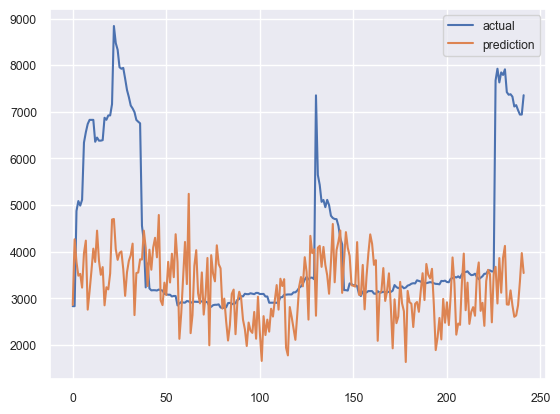

In [43]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [22]:
#상관 관계 행렬

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
import seaborn as sns

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
data.keys()


Index(['year', 'avgTemp', 'maxTemp', 'minTemp', 'rainFall', 'avgPrice'], dtype='object')

In [26]:
df = pd.DataFrame(data)
df.head(5)

,year,avgTemp,maxTemp,minTemp,rainFall,avgPrice
0,20130102,6.2,10.9,1.3,0.0,2434
1,20130103,2.3,5.5,0.1,0.0,2501
2,20130104,3.4,6.7,0.3,0.0,2483
3,20130107,6.6,8.6,3.8,0.0,2491
4,20130108,7.9,10.8,5.1,0.0,2491


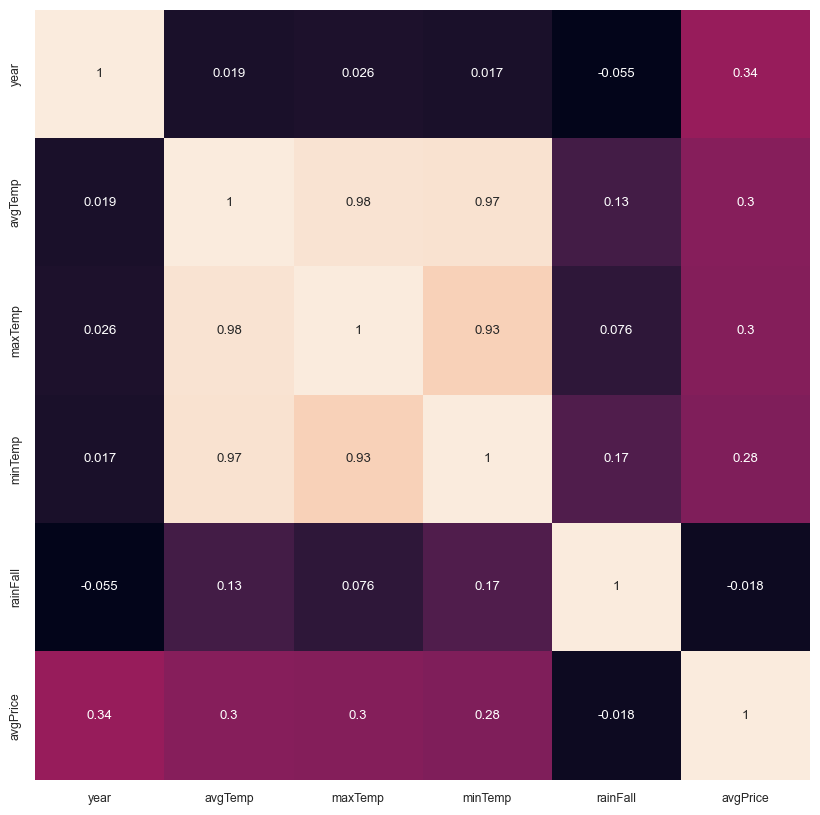

In [25]:
df = pd.DataFrame(data)
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [44]:
# 감귤 튀는 값(2021년 7월-9월 가격 삭제) 빼고 진행 -> 훈련데이터(뒤에서부터 70%)와 테스트 데이터(앞에서부터 30%) 순서 바꿈
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# 학습 데이터와 테스트 데이터로 분리합니다.
train_x_data = xy[300:, 1:-1]  # 300번째 이후 데이터를 학습 데이터로 사용합니다.
train_y_data = xy[300:, [-1]]
test_x_data = xy[:300, 1:-1]  # 0 ~ 299번째 데이터를 테스트 데이터로 사용합니다.
test_y_data = xy[:300, [-1]]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# 0  손실 비용:  15996506.0
# 500  손실 비용:  2794465.0
# 1000  손실 비용:  2641284.8
# 1500  손실 비용:  2610135.5
# 2000  손실 비용:  2581929.5
# 2500  손실 비용:  2555367.8
# 3000  손실 비용:  2530277.8
# 3500  손실 비용:  2506529.8
# 4000  손실 비용:  2484016.2
# 4500  손실 비용:  2462649.0
# 5000  손실 비용:  2442351.2
# 5500  손실 비용:  2423056.5
# 6000  손실 비용:  2404706.5
# 6500  손실 비용:  2387248.0
# 7000  손실 비용:  2370633.0
# 7500  손실 비용:  2354817.5
# 8000  손실 비용:  2339760.0
# 8500  손실 비용:  2325422.0
# 9000  손실 비용:  2311768.2
# 9500  손실 비용:  2298764.5
# 10000  손실 비용:  2286379.8
# 10500  손실 비용:  2274582.5
# 11000  손실 비용:  2263344.8
# 11500  손실 비용:  2252640.0
# 12000  손실 비용:  2242441.8
# 12500  손실 비용:  2232725.8
# 13000  손실 비용:  2223468.8
# 13500  손실 비용:  2214648.8
# 14000  손실 비용:  2206245.0
# 14500  손실 비용:  2198236.8
# 15000  손실 비용:  2190605.8
# 15500  손실 비용:  2183333.8
# 16000  손실 비용:  2176402.8
# 16500  손실 비용:  2169797.5
# 17000  손실 비용:  2163501.5
# 17500  손실 비용:  2157500.5
# 18000  손실 비용:  2151780.0
# 18500  손실 비용:  2146326

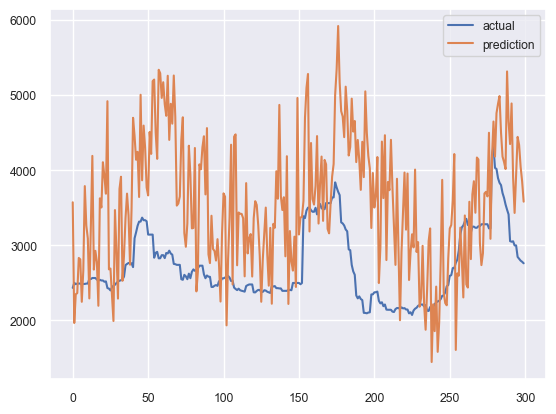

In [45]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [29]:
# 감귤 튀는 값(2021년 7월-9월 가격 삭제) 빼고 진행 -> 훈련데이터와 테스트 데이터 셔플 후 8:2 비율로 나눈 후 학습 진행
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# feature와 target 데이터로 나눕니다.
X = xy[:, :-1]
y = xy[:, [-1]]

# 훈련 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 훈련 데이터와 테스트 데이터를 셔플합니다.
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

test_indices = np.arange(X_test.shape[0])
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# 0  손실 비용:  15627946.0
# 500  손실 비용:  2788757.5
# 1000  손실 비용:  2638819.5
# 1500  손실 비용:  2607679.2
# 2000  손실 비용:  2579501.5
# 2500  손실 비용:  2553000.5
# 3000  손실 비용:  2527993.0
# 3500  손실 비용:  2504340.8
# 4000  손실 비용:  2481930.8
# 4500  손실 비용:  2460670.5
# 5000  손실 비용:  2440480.5
# 5500  손실 비용:  2421293.2
# 6000  손실 비용:  2403048.5
# 6500  손실 비용:  2385692.2
# 7000  손실 비용:  2369176.8
# 7500  손실 비용:  2353456.0
# 8000  손실 비용:  2338489.8
# 8500  손실 비용:  2324239.8
# 9000  손실 비용:  2310669.8
# 9500  손실 비용:  2297746.2
# 10000  손실 비용:  2285437.5
# 10500  손실 비용:  2273713.2
# 11000  손실 비용:  2262545.0
# 11500  손실 비용:  2251906.2
# 12000  손실 비용:  2241771.0
# 12500  손실 비용:  2232115.0
# 13000  손실 비용:  2222915.0
# 13500  손실 비용:  2214149.8
# 14000  손실 비용:  2205797.5
# 14500  손실 비용:  2197839.0
# 15000  손실 비용:  2190254.5
# 15500  손실 비용:  2183027.0
# 16000  손실 비용:  2176138.8
# 16500  손실 비용:  2169573.5
# 17000  손실 비용:  2163316.5
# 17500  손실 비용:  2157351.8
# 18000  손실 비용:  2151666.0
# 18500  손실 비용:  2146246

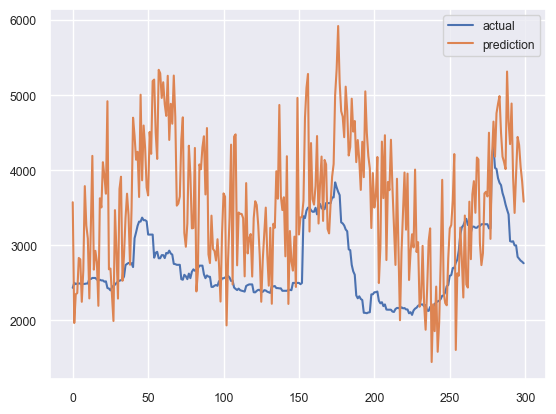

In [30]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()

In [31]:
# 감귤 튀는 값(2021년 7월-9월 가격 삭제) 빼고 진행 -> 훈련데이터와 테스트 데이터 셔플 후 9:1 비율로 나눈 후 학습 진행
import tensorflow.compat.v1 as tf
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.parsers import read_csv
tf.disable_v2_behavior()
from sklearn.model_selection import train_test_split

# 데이터를 읽어들입니다.
data = read_csv('C:\\try.csv', sep=',')
xy = np.array(data, dtype=np.float32)

# feature와 target 데이터로 나눕니다.
X = xy[:, :-1]
y = xy[:, [-1]]

# 훈련 데이터와 테스트 데이터로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 훈련 데이터와 테스트 데이터를 셔플합니다.
train_indices = np.arange(X_train.shape[0])
np.random.shuffle(train_indices)
X_train = X_train[train_indices]
y_train = y_train[train_indices]

test_indices = np.arange(X_test.shape[0])
np.random.shuffle(test_indices)
X_test = X_test[test_indices]
y_test = y_test[test_indices]

# 플레이스홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 4])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([4, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 비용 함수를 설정합니다.
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 최적화 함수를 설정합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000005)
train = optimizer.minimize(cost)

# 세션을 생성합니다.
sess = tf.Session()

# 글로벌 변수를 초기화합니다.
sess.run(tf.global_variables_initializer())

# 비용 그래프를 그리기 위한 리스트를 생성합니다.
cost_list = []

# 학습을 수행합니다.
for step in range(100001):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: train_x_data, Y: train_y_data})
    cost_list.append(cost_)
    if step % 500 == 0:
        print("#", step, " 손실 비용: ", cost_)

# 테스트 데이터로 모델의 성능을 평가합니다.
predict_y = sess.run(hypothesis, feed_dict={X: test_x_data})

mae = np.sum(np.abs(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
mse = np.sum(np.square(test_y_data - sess.run(hypothesis, feed_dict={X: test_x_data}))) / len(test_y_data)
rmse = np.sqrt(mse)
print("MAE: {}".format(mae))
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))

# 0  손실 비용:  15705150.0
# 500  손실 비용:  2797171.2
# 1000  손실 비용:  2646580.5
# 1500  손실 비용:  2615304.8
# 2000  손실 비용:  2586925.2
# 2500  손실 비용:  2560177.0
# 3000  손실 비용:  2534894.2
# 3500  손실 비용:  2510951.5
# 4000  손실 비용:  2488245.8
# 4500  손실 비용:  2466689.2
# 5000  손실 비용:  2446208.2
# 5500  손실 비용:  2426736.2
# 6000  손실 비용:  2408215.5
# 6500  손실 비용:  2390593.2
# 7000  손실 비용:  2373821.0
# 7500  손실 비용:  2357855.2
# 8000  손실 비용:  2342654.5
# 8500  손실 비용:  2328179.5
# 9000  손실 비용:  2314395.2
# 9500  손실 비용:  2301267.5
# 10000  손실 비용:  2288763.2
# 10500  손실 비용:  2276853.5
# 11000  손실 비용:  2265508.0
# 11500  손실 비용:  2254700.8
# 12000  손실 비용:  2244405.0
# 12500  손실 비용:  2234596.0
# 13000  손실 비용:  2225250.5
# 13500  손실 비용:  2216346.0
# 14000  손실 비용:  2207861.8
# 14500  손실 비용:  2199777.8
# 15000  손실 비용:  2192073.8
# 15500  손실 비용:  2184732.2
# 16000  손실 비용:  2177735.5
# 16500  손실 비용:  2171067.8
# 17000  손실 비용:  2164711.8
# 17500  손실 비용:  2158654.0
# 18000  손실 비용:  2152879.0
# 18500  손실 비용:  2147374

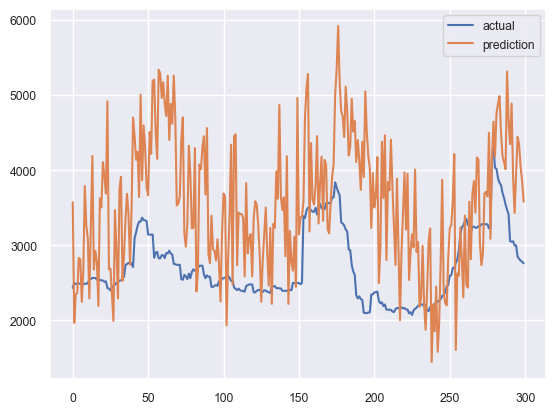

In [32]:
# 테스트 데이터의 실제값과 예측값을 비교하는 그래프를 그립니다.
plt.plot(test_y_data, label='actual')
plt.plot(predict_y, label='prediction')
plt.legend()
plt.show()